# TMDB Movies Dataset: Predicting Movie Ratings, XGBoost vs. (LGBM and RandomForest) Stacking

We have already examined the TMDB movie dataset in detail in a previous project. In this project, our goal is to build a robust machine learning model to predict the average user rating ("vote_average") of movies, using the TMDB dataset. Given that the dataset is frequently updated with new movies, releases and votes, relying on a single model may not be sufficient. To account for this, we will employ a combination of powerful machine learning algorithms, XGBoost Regressor, (Light-)GBM Regressor and RandomFOrest Regressor and further enhance the performance by combining LGBM and RandomForest into a stacking model with a Linear Regression meta-model. This approach allows us to leverage the strengths of those models and mitigate potential inaccuracies due to changes in the dataset. This way we can compare the XGBoost model and the stacking model.

### Overview of the Process
Data Filtering and Feature Engineering:  
We begin by reducing the dataset to include only important movies, specifically those that meet a predefined minimum number of votes ("vote_count") and have already been released. This filtering helps eliminate noise and focus the model on more meaningful data.
We will also create custom transformers to handle certain data preprocessing tasks, such as clustering movies based on vote count and release year. These transformers provide flexibility and allow us to quickly adapt the data preparation process as needed.  
Modeling Approach:  
Then we will utilize GridSearchCV for hyperparameter optimization of the models, ensuring that the models are fine-tuned to achieve the best possible performance. 
After obtaining the best versions of the models, we will combine the LGBM and RandomForest models into a stacking model, where the predictions of both models are passed to a Linear Regression meta-model. The stacking approach allows us to combine the strengths of both base models and further improve accuracy.  
Model Evaluation:  
Once all models are trained, we will compare their performance using the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) metrics on both the training and test datasets. This comparison will help us understand the strengths and weaknesses of each individual model and the final stacking model.


### Code Overview
The project starts by preparing the dataset using transformers for clustering and scaling. The Pipeline is constructed for all the models, where:  
We define custom clusters based on vote counts and release years, process columns with missing values, define new columns for more data insight and a vecorizer for columns containing only strings.
We apply log transformations and scaling to relevant features to ensure the models receive well-preprocessed data.
Each model is then trained and fine-tuned using GridSearchCV to identify the best set of hyperparameters.

After hyperparameter tuning, the best LGBM and RandomForest models are combined into a stacking ensemble. The stacking model uses the predictions of both the LGBM and RandomForest models as inputs and fits a Linear Regression model as the final estimator to make the final predictions.

### Key Highlights:
LGBM Regressor and XGBoost Regressor are known for their high performance in regression tasks and ability to handle large datasets efficiently.
GridSearchCV helps find the best hyperparameters by performing an exhaustive search, ensuring the model is fine-tuned for maximum accuracy.
Stacking combines multiple models, which often leads to better predictive performance compared to using a single model.  

Evaluation Metrics: We will use MSE and RMSE to evaluate the models' accuracy on both the training and test data.  

This project aims to develop a highly accurate model to predict movie ratings while remaining flexible and adaptable to changes in the dataset.

----
# Load and Preprocess Data

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df_start = pd.read_csv('/kaggle/input/tmdb-movies-dataset-2023-930k-movies/TMDB_movie_dataset_v11.csv')

pd.set_option('display.max_columns', None)
df_start.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


As in the previous project, "TMDB Movies Dataset: Data Exploration," we will define the columns "release_year" and "movie_age" and reduce the data in the same way afterwards.

In [3]:
# Remove features 'id' and 'imdb_id' from the data
df_start.drop(['id', 'imdb_id'], axis=1, inplace=True)

# Remove duplicate rows from data
duplicate_rows = df_start[df_start.duplicated(keep=False)]
df_start.drop_duplicates(keep='first', inplace=True, ignore_index=True)

# Define release dates
current_year = datetime.datetime.now().year

def get_year(x):
    try:
        return int(str(x)[:4])
    except:
        return None

df_start['release_year'] = df_start['release_date'].apply(get_year).fillna(0).astype(int)

# Fake movies are filtered out.
df_start = df_start[(df_start["release_year"] <= current_year)]

# Definietion of movie_age
df_start['movie_age'] = current_year - df_start['release_year']

In [4]:
# Reducing the data
df=df_start[(df_start["vote_count"] > 7) & (df_start["status"] == "Released") & (df_start["release_year"] > 0) & (df_start["runtime"] < 2000) & (df_start["release_year"] >= 1895)]

----
# Data Engineering

Since there are some columns in the DataFrame that we need to adjust, two pipelines are defined.  
The first pipeline prepares most of the columns and the second pipeline is later used for the grid search.  
  
Since the original dataframe is updated daily and an update may introduce new features, it is beneficial to work with pipelines and custom transformers. While some custom transformers are quite simple, all transformers together allow the data preparation to be adjusted for the new update only in a few places.

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin, check_is_fitted
from sklearn.preprocessing import OneHotEncoder as SKLearnOneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# For outlier removal
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Custom Transformers

We define a custom transformer that extracts season and weekend information from the release date.

In [6]:
class ReleaseDateTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to process release date information.

    Attributes:
    - None (this transformer does not need to maintain state between fit and transform).
    """

    def __init__(self):
        """
        Initialize ReleaseDateTransformer. No specific parameters are required.
        """
        pass

    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data. This method does not use the data for fitting.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        return self

    def transform(self, X):
        """
        Transform the input data by extracting and engineering features from the release date.

        Parameters:
        - X (DataFrame): Input data. Must contain a 'release_date' column.

        Returns:
        - X (DataFrame): Transformed data with additional features derived from 'release_date'.
        
        The following features are added:
        - 'release_season': Numeric value representing the season of the release date.
        - 'release_weekend': Binary value indicating whether the release date falls on a weekend (1 for weekend, 0 otherwise).
        """
        # Convert 'release_date' column to datetime, coercing errors to NaT (Not a Time)
        X['release_date'] = pd.to_datetime(X['release_date'], errors='coerce')
        
        # Extract season from release_date. Seasons are numbered as follows: 
        # 1: Spring, 2: Summer, 3: Autumn, 4: Winter
        X['release_season'] = X['release_date'].dt.month % 12 // 3 + 1
        
        # Determine if the release date is on a weekend
        # Weekdays >= 4 (i.e., Friday, Saturday, Sunday) are considered weekends
        X['release_weekend'] = X['release_date'].dt.weekday.apply(lambda x: 1 if x >= 4 else 0)
        
        return X

Columsn like "vote_count" should receive more attention in the model. We will define a transformation class that will cluster a column. On these cluster we will use a OneHotEncoder.

In [7]:
class ColumnCategoryTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to categorize numeric values in a specified column.

    Parameters:
    - column_name (str): Name of the column to categorize.
    - bins (list): List of bin edges for categorization.
    - labels (list): Labels for each category.

    Attributes:
    - column_name (str): Name of the column to categorize.
    - bins (list): List of bin edges for categorization.
    - labels (list): Labels for each category.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, column_name, bins, labels):
        """
        Initialize ColumnCategoryTransformer with specified column name, bins, and labels.
        """
        self.column_name = column_name
        self.bins = bins
        self.labels = labels
        self.is_fitted_ = False
        self.onehot_encoder = SKLearnOneHotEncoder(sparse_output=False, drop='first')
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by categorizing the specified column.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with additional one-hot encoded columns for categories.
        """
        check_is_fitted(self, 'is_fitted_')

        if self.column_name not in X.columns:
            raise ValueError(f"Column '{self.column_name}' not present in the data.")

        if not all(self.bins[i] < self.bins[i+1] for i in range(len(self.bins)-1)):
            raise ValueError("Bins must be specified in ascending order.")

        if len(self.labels) != len(self.bins) - 1:
            raise ValueError("The number of labels should be one less than the number of bins.")

        if not pd.api.types.is_numeric_dtype(X[self.column_name]):
            raise ValueError(f"The values in column '{self.column_name}' should be numeric.")

        categories = pd.cut(X[self.column_name], bins=self.bins, labels=self.labels)
        X_temp = X.assign(vote_count_category=categories)
        self.onehot_encoder.fit(X_temp)
        encoded_categories = self.onehot_encoder.transform(X_temp)

        new_column_names = [f"{self.column_name}_category_{label}" for label in self.labels[1:]]

        for i, new_col_name in enumerate(new_column_names):
            X[new_col_name] = encoded_categories[:, i]

        return X

The columns 'backdrop_path', 'homepage', 'overview', 'poster_path' and 'tagline' have some missing values. Nevertheless, these columns can be used to generate information. If an entry exists, we set the value to 1; otherwise, we set it to 0.  
This way, we have information about how much attention has been generated for a movie.

In [8]:
class ProcessColumns(BaseEstimator, TransformerMixin):
    """
    Custom transformer to process specified columns by encoding non-null values as 1 and null values as 0.

    Parameters:
    - columns_to_process (list): List of column names to be processed.

    Attributes:
    - columns_to_process (list): List of column names to be processed.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, columns_to_process):
        """
        Initialize ProcessColumns with specified columns to process.
        """
        self.columns_to_process = columns_to_process
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not all(column in X.columns for column in self.columns_to_process):
            missing_columns = [column for column in self.columns_to_process if column not in X.columns]
            raise ValueError(f"The following columns are missing in the input data: {missing_columns}")
        
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by encoding non-null values as 1 and null values as 0 in specified columns.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X_copy (DataFrame): Transformed data with specified columns processed.
        """
        check_is_fitted(self, 'is_fitted_')
        
        X_copy = X.copy()
        for column in self.columns_to_process:
            X_copy[column] = X_copy[column].apply(lambda x: 1 if not pd.isnull(x) else 0)
        return X_copy

The "adult" column contains only two different entries. We will use a LabelBinarizer to convert the entries into a numerical format.

In [9]:
class LabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to perform label binarization on a specified column.

    Parameters:
    - column_name (str): Name of the column to binarize.

    Attributes:
    - column_name (str): Name of the column to binarize.
    - binarizer (LabelBinarizer): Instance of LabelBinarizer for binarizing labels.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, column_name):
        """
        Initialize LabelBinarizerTransformer with specified column name.
        """
        self.column_name = column_name
        self.binarizer = LabelBinarizer()
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if self.column_name not in X.columns:
            raise ValueError(f"Column '{self.column_name}' not found in the input data.")
        
        self.binarizer.fit(X[self.column_name])
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by binarizing the specified column.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with the specified column binarized.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if self.column_name not in X.columns:
            raise ValueError(f"Column '{self.column_name}' not found in the input data.")
        
        transformed_data = self.binarizer.transform(X[self.column_name])
        transformed_df = pd.DataFrame(transformed_data, columns=[self.column_name + '_encoded'])
        X = X.drop(self.column_name, axis=1)
        X.reset_index(drop=True, inplace=True)
        transformed_df.reset_index(drop=True, inplace=True)
        return pd.concat([X, transformed_df], axis=1)

Relationships between individual columns can provide important information for a model. With the defined transformer, we can generate various new columns. Our focus will be on the features where we identified a correlation in the previous project.

In [10]:
class NewColumnTransformer(TransformerMixin, BaseEstimator):
    """
    Custom transformer to create new columns by performing operations on specified pairs of columns.

    Parameters:
    - column_pairs (list of tuples): List of tuples where each tuple contains two column names.

    Attributes:
    - column_pairs (list of tuples): List of tuples where each tuple contains two column names.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, column_pairs):
        """
        Initialize NewColumnTransformer with specified column pairs.
        """
        self.column_pairs = column_pairs
        self.is_fitted_ = False

    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not isinstance(self.column_pairs, list) or not all(isinstance(pair, tuple) and len(pair) == 2 for pair in self.column_pairs):
            raise ValueError("column_pairs must be a list of tuples with two elements each.")
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by creating new columns based on specified column pairs.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X_copy (DataFrame): Transformed data with new columns created.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if not isinstance(self.column_pairs, list) or not all(isinstance(pair, tuple) and len(pair) == 2 for pair in self.column_pairs):
            raise ValueError("column_pairs must be a list of tuples with two elements each.")
        
        X_copy = X.copy()
        for column_A, column_B in self.column_pairs:
            if column_A not in X.columns or column_B not in X.columns:
                raise ValueError(f"Columns '{column_A}' and '{column_B}' must be present in the input DataFrame.")
            
            new_column_name = column_A + '_to_' + column_B
            X_copy[new_column_name] = X_copy[column_A] / X_copy[column_B]
            X_copy.loc[X_copy[column_B] == 0, new_column_name] = 0
        return X_copy


class NewColumnMeanTransformer(TransformerMixin, BaseEstimator):
    """
    Custom transformer to create new columns by performing operations between a column and the mean of another column.

    Parameters:
    - column_pairs_mean (list of tuples): List of tuples where each tuple contains two column names.

    Attributes:
    - column_pairs_mean (list of tuples): List of tuples where each tuple contains two column names.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, column_pairs_mean):
        """
        Initialize NewColumnMeanTransformer with specified column pairs for mean transformation.
        """
        self.column_pairs_mean = column_pairs_mean
        self.is_fitted_ = False

    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not isinstance(self.column_pairs_mean, list) or not all(isinstance(pair, tuple) and len(pair) == 2 for pair in self.column_pairs_mean):
            raise ValueError("column_pairs_mean must be a list of tuples with two elements each.")
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by creating new columns based on specified column pairs for mean transformation.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X_copy (DataFrame): Transformed data with new columns created.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if not isinstance(self.column_pairs_mean, list) or not all(isinstance(pair, tuple) and len(pair) == 2 for pair in self.column_pairs_mean):
            raise ValueError("column_pairs_mean must be a list of tuples with two elements each.")
        
        X_copy = X.copy()
        for column_A, column_B in self.column_pairs_mean:
            if column_A not in X.columns or column_B not in X.columns:
                raise ValueError(f"Columns '{column_A}' and '{column_B}' must be present in the input DataFrame.")
            
            new_column_name = column_A + '_to_mean_' + column_B
            X_copy[new_column_name] = X_copy[column_A] / X_copy.groupby(column_B)[column_A].transform('mean')
            X_copy.loc[X_copy[column_B] == 0, new_column_name] = 0
        return X_copy

The entries of columns such as "genres" consist of a list of terms. With the following transformer, these lists can be separated. For each existing genre, a new column is created. This new column is filled with a 1 if the respective genre appeared in the "genre" column. Otherwise, a 0 is entered.  
We have the option to determine in advance how often a single term has to appear in the entire column to be considered and we can set a maximum for the number of new columns to be generated.

In [11]:
class ColumnVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, vec_col_number):
        """
        Initializes the ColumnVectorizer with the specified columns to be vectorized.

        Parameters:
        - vec_col_number (list of tuples): A list where each tuple contains a column name 
          and a minimum document frequency threshold for the CountVectorizer.
        """
        self.vec_col_number = vec_col_number  # Store the column names and their min_df thresholds
        self.vectorizers_ = {}  # Dictionary to store CountVectorizer instances for each column
        self.vocabulary_ = {}  # Dictionary to store combined vocabulary for all columns
        self.is_fitted_ = False  # Flag to indicate if the transformer is fitted

    def fit(self, X, y=None):
        """
        Fits the ColumnVectorizer to the input data.

        Parameters:
        - X (DataFrame): The input data for fitting the transformer.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns the instance of the transformer.
        """
        # Validate that vec_col_number is a list of tuples, each containing a column name and a min_df value
        if not isinstance(self.vec_col_number, list) or not all(isinstance(pair, tuple) and len(pair) == 2 for pair in self.vec_col_number):
            raise ValueError("vec_col_number must be a list of tuples, where each tuple contains a column name and a minimum document frequency.")
        
        # Extract the column names from the input DataFrame
        columns = X.columns.tolist()
        
        # Check that all specified columns exist in the input DataFrame
        for col, _ in self.vec_col_number:
            if col not in columns:
                raise ValueError(f"Column '{col}' not found in the input data.")
        
        # Initialize vectorizers and build vocabulary for each specified column
        for col, min_df in self.vec_col_number:
            # Create a CountVectorizer with specified parameters
            vectorizer = CountVectorizer(max_features=60, min_df=min_df, max_df=1.0, lowercase=False)
            
            # Prepare the data for fitting the vectorizer
            # Replace missing values with 'none' and split the strings into lists
            listlist = X[col].fillna('none').str.split(', ').to_list()
            listlist = [[
                # Clean and standardize the words by replacing special characters
                word.rstrip(', ').strip(' ').replace('/', '_').replace('.', '_').replace('*', '_').replace('+', '_').replace(',', '_').replace('\'', '_').replace(' ', '_').replace('.', '_').replace('&', '_').replace('+', '_').replace('-', '_').replace('!', '_')
                for word in list
            ] for list in listlist]

            # Create a new list to hold the cleaned strings for fitting
            listlistnew = []
            for item in listlist:
                if item != ['none']:
                    # Join the words back into a single string if not equal to 'none'
                    words = ' '.join(item)
                else:
                    words = 'none'  # Retain 'none' if the item was empty
                listlistnew.append(words)
            
            # Fit the vectorizer on the prepared list
            vectorizer.fit(listlistnew)
            # Store the fitted vectorizer in the dictionary
            self.vectorizers_[col] = vectorizer
            # Update the vocabulary dictionary with the vectorizer's vocabulary
            self.vocabulary_.update({v: col + '_' + k for k, v in vectorizer.vocabulary_.items()})
        
        self.is_fitted_ = True  # Set the fitted flag to True
        return self  # Return the instance of the transformer

    def transform(self, X):
        """
        Transforms the input data by vectorizing specified columns.

        Parameters:
        - X (DataFrame): The input data to be transformed.

        Returns:
        - X (DataFrame): The transformed data with new vectorized columns.
        """
        check_is_fitted(self, 'is_fitted_')  # Ensure the transformer has been fitted
        
        # Validate that vec_col_number is a list of tuples
        if not isinstance(self.vec_col_number, list) or not all(isinstance(pair, tuple) and len(pair) == 2 for pair in self.vec_col_number):
            raise ValueError("vec_col_number must be a list of tuples, where each tuple contains a column name and a minimum document frequency.")
        
        transformed_dfs = []  # List to hold transformed DataFrames for each column
        
        # Loop through each specified column for transformation
        for col, _ in self.vec_col_number:
            vectorizer = self.vectorizers_[col]  # Retrieve the fitted vectorizer for the column
            
            # Prepare the data for transformation
            listlist = X[col].fillna('none').str.split(', ').to_list()
            listlist = [[
                # Clean and standardize the words similarly as in fit
                word.rstrip(', ').strip(' ').replace('/', '_').replace('.', '_').replace('*', '_').replace('+', '_').replace(',', '_').replace('\'', '_').replace(' ', '_').replace('.', '_').replace('&', '_').replace('+', '_').replace('-', '_').replace('!', '_')
                for word in list
            ] for list in listlist]

            # Create a new list to hold the cleaned strings for transformation
            listlistnew = []
            for item in listlist:
                if item != ['none']:
                    words = ' '.join(item)  # Join words if not equal to 'none'
                else:
                    words = 'none'  # Retain 'none' if empty
                listlistnew.append(words)
            
            # Transform the prepared list using the vectorizer
            vector = vectorizer.transform(listlistnew)
            # Create a DataFrame from the transformed vector
            newcolumns = pd.DataFrame(vector.toarray(), columns=[col + '_' + k for k in vectorizer.get_feature_names_out()])
            transformed_dfs.append(newcolumns)  # Append the new columns to the list
        
        # Combine all transformed DataFrames into a single DataFrame
        transformed_df = pd.concat(transformed_dfs, axis=1)
        
        # Drop the original columns specified for vectorization
        X = X.drop([col for col, _ in self.vec_col_number], axis=1, errors='ignore')
        # Concatenate the original DataFrame (minus dropped columns) with the new transformed columns
        X = pd.concat([X.reset_index(drop=True), transformed_df.reset_index(drop=True)], axis=1)
        
        return X

For the ColumnVectorizer, we need to decide on values for the parameters min_df and max_features.

In [12]:
cols_vec = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'original_language', 'keywords']

for col in cols_vec:
    print("Number of distinct values for", col, ": ", len(df[col].value_counts()))
    print(df[col].value_counts().head(50))
    print("=" * 100)

Number of distinct values for genres :  6634
genres
Drama                        9762
Comedy                       8000
Documentary                  5407
Drama, Romance               2510
Horror                       2443
Comedy, Drama                2312
Comedy, Romance              1736
Animation                    1338
Drama, Comedy                1197
Horror, Thriller             1072
Drama, Thriller               919
Thriller                      910
Comedy, Drama, Romance        834
Romance, Drama                776
Action                        711
Crime, Drama                  707
Drama, History                644
Animation, Comedy             604
Romance, Comedy               582
Action, Thriller              564
Action, Drama                 560
Western                       522
Documentary, Music            474
Music                         449
Drama, TV Movie               435
Drama, Crime                  418
Thriller, Horror              398
Horror, Science Fiction       

We define the values for the parameter min_df as follows:

In [13]:
# Define the number of vectorized features for specific columns
vec_col_number = [
    ('genres', 100), 
    ('production_companies', 80), 
    ('production_countries', 100), 
    ('spoken_languages', 100), 
    ('original_language', 90), 
    ('keywords', 30)
]

The columns generated by the ColumnVectorizer are summed to generate further information.

In [14]:
class SumOfColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to calculate the sum of specified columns and add the result as a new column.

    Parameters:
    - columns_to_sum (list of str): List of column names to sum.

    Attributes:
    - columns_to_sum (list of str): List of column names to sum.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, columns_to_sum):
        """
        Initialize SumOfColumnsTransformer with specified columns to sum.
        """
        self.columns_to_sum = columns_to_sum
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not isinstance(self.columns_to_sum, list):
            raise ValueError("columns_to_sum must be a list of column names.")
        
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by calculating the sum of specified columns and adding the result as a new column.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with sum of specified columns added as new columns.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if not isinstance(self.columns_to_sum, list):
            raise ValueError("columns_to_sum must be a list of column names.")
        
        new_cols_vec = []
        for col in self.columns_to_sum:
            columns = X.filter(like=col)
            new_column_name = 'sum_of_' + col
            new_cols_vec.append(new_column_name)
            X[new_column_name] = columns.sum(axis=1)
        return X

A simple transformer to drop columns.

In [15]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to drop specified columns from the input DataFrame.

    Parameters:
    - columns_to_drop (list of str): List of column names to drop.

    Attributes:
    - columns_to_drop (list of str): List of column names to drop.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, columns_to_drop):
        """
        Initialize DropColumnsTransformer with specified columns to drop.
        """
        self.columns_to_drop = columns_to_drop
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not isinstance(self.columns_to_drop, list):
            raise ValueError("columns_to_drop must be a list of column names.")
        
        columns = X.columns.tolist()
        for col in self.columns_to_drop:
            if col not in columns:
                raise ValueError(f"Column '{col}' not found in the input data.")
        
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by dropping specified columns.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with specified columns dropped.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if not isinstance(self.columns_to_drop, list):
            raise ValueError("columns_to_drop must be a list of column names.")
        
        X.drop(columns=self.columns_to_drop, inplace=True)
        return X

All previously defined transformers will be included in the first pipeline, which we will define later. The following transformers will be integrated into a second pipeline, which will be used for GridSearch later on. The transformers in this second pipeline can be adjusted to optimize the model's hyperparameters.

The subsequent custom transformer utilizes the KMeans algorithm to cluster a specified feature (vote_count and release_year). By integrating this transformer into the second pipeline, we can optimize the number of clusters using a grid search.

In [16]:
class ColumnClusterTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to perform clustering on a specified column.

    Parameters:
    - column_name (str): Name of the column to cluster.
    - n_clusters (int): Number of clusters.
    - random_state (int): Random seed for reproducibility.

    Attributes:
    - column_name (str): Name of the column to cluster.
    - n_clusters (int): Number of clusters.
    - random_state (int): Random seed for reproducibility.
    - kmeans (KMeans): KMeans clustering model.
    - cluster_centers_ (array): Cluster centers.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, column_name, n_clusters=20, random_state=42):
        """
        Initialize ColumnClusterTransformer with specified parameters.
        """
        self.column_name = column_name
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if self.column_name not in X.columns:
            raise ValueError(f"Column '{self.column_name}' not found in the input data.")
        
        if not pd.api.types.is_numeric_dtype(X[self.column_name]):
            raise ValueError(f"Column '{self.column_name}' must contain numeric data for clustering.")
        
        column_data = X[self.column_name].values.reshape(-1, 1)
        
        scaler = StandardScaler()
        column_data_scaled = scaler.fit_transform(column_data)
        
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=self.random_state, n_init=10)
        self.kmeans.fit(column_data_scaled)
        self.cluster_centers_ = scaler.inverse_transform(self.kmeans.cluster_centers_)
        
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by performing clustering on the specified column.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with cluster labels added as a new column.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if self.column_name not in X.columns:
            raise ValueError(f"Column '{self.column_name}' not found in the input data.")
        
        if not pd.api.types.is_numeric_dtype(X[self.column_name]):
            raise ValueError(f"Column '{self.column_name}' must contain numeric data for clustering.")
        
        column_data = X[self.column_name].values.reshape(-1, 1)
        scaler = StandardScaler()
        column_data_scaled = scaler.fit_transform(column_data)
        labels = self.kmeans.predict(column_data_scaled)
        
        X = X.copy()
        X[self.column_name + '_cluster'] = labels
        return X

A simple transformer that uses the log1-function to handle outliers. 

In [17]:
class LogTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to perform logarithmic transformation on specified columns.

    Parameters:
    - columns_to_log (list of str): List of column names to log-transform.

    Attributes:
    - columns_to_log (list of str): List of column names to log-transform.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, columns_to_log):
        """
        Initialize LogTransformer with specified columns to log-transform.
        """
        self.columns_to_log = columns_to_log
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not isinstance(self.columns_to_log, list):
            raise ValueError("columns_to_log must be a list of column names.")

        columns = X.columns.tolist()
        for col in self.columns_to_log:
            if col not in columns:
                raise ValueError(f"Column '{col}' not found in the input data.")
        
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by performing logarithmic transformation on specified columns.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with specified columns log-transformed.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if not isinstance(self.columns_to_log, list):
            raise ValueError("columns_to_log must be a list of column names.")
        
        columns = X.columns.tolist()
        for col in self.columns_to_log:
            if col not in columns:
                raise ValueError(f"Column '{col}' not found in the input data.")
        
        X = X.copy()
        X[self.columns_to_log] = np.log1p(X[self.columns_to_log])
        return X

A simple transformer that applies the MinMaxScaler. We use the MinMaxScaler as we do not have negative values in our data.

In [18]:
class ScaleColumnsTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to scale specified columns using Min-Max scaling.

    Parameters:
    - columns_to_scale (list of str): List of column names to scale.

    Attributes:
    - columns_to_scale (list of str): List of column names to scale.
    - scaler (MinMaxScaler): Scaler object for Min-Max scaling.
    - is_fitted_ (bool): Flag to indicate if the transformer is fitted.
    """

    def __init__(self, columns_to_scale):
        """
        Initialize ScaleColumnsTransformer with specified columns to scale.
        """
        self.columns_to_scale = columns_to_scale
        self.scaler = MinMaxScaler()
        self.is_fitted_ = False
    
    def fit(self, X, y=None):
        """
        Fit the transformer to the data.

        Parameters:
        - X (DataFrame): Input data.
        - y: Ignored. Present for compatibility.

        Returns:
        - self: Returns an instance of self.
        """
        if not isinstance(self.columns_to_scale, list):
            raise ValueError("columns_to_scale must be a list of column names.")
        
        columns = X.columns.tolist()
        for col in self.columns_to_scale:
            if col not in columns:
                raise ValueError(f"Column '{col}' not found in the input data.")
        
        self.scaler.fit(X[self.columns_to_scale])
        self.is_fitted_ = True
        return self

    def transform(self, X):
        """
        Transform the input data by scaling specified columns using Min-Max scaling.

        Parameters:
        - X (DataFrame): Input data.

        Returns:
        - X (DataFrame): Transformed data with specified columns scaled.
        """
        check_is_fitted(self, 'is_fitted_')
        
        if not isinstance(self.columns_to_scale, list):
            raise ValueError("columns_to_scale must be a list of column names.")
        
        columns = X.columns.tolist()
        for col in self.columns_to_scale:
            if col not in columns:
                raise ValueError(f"Column '{col}' not found in the input data.")
        
        X = X.copy()
        X[self.columns_to_scale] = self.scaler.transform(X[self.columns_to_scale])
        return X

### Train and Test Data and Outlier Removal

After defining all the transformers we need, we will split the dataset into a training set and a test set. We do not need a separate validation set, as this will be defined within the GridSearchCV. 

At this point, it is also important to note that the label 'vote_average' will remain in the data until after we have dealt with outliers. We will remove it after addressing the outliers.

Removing outliers from the data is important because outliers can significantly distort statistical analyses and model performance. They can introduce noise, bias and lead to overfitting, where the model learns to recognize the noise instead of the underlying patterns in the data. By removing outliers, we aim to create a cleaner dataset that better represents the majority of observations, thereby improving the model's accuracy and robustness.

When it comes to preparing data for machine learning, it is also crucial to split the dataset into training and test sets before handling outliers. The training set is used to train the model, while the test set is reserved for evaluating its performance on unseen data. By removing outliers only from the training set, we ensure that the model learns from a refined dataset that excludes extreme values, enhancing its ability to generalize.

However, keeping the outliers in the test set is essential for a couple of reasons. First, it allows for a more realistic assessment of the model's performance in real-world scenarios, where outliers may still exist. Second, it helps to gauge how well the model can handle atypical data points and ensures that it is not simply memorizing the training data without being capable of addressing unexpected variations. This approach fosters a better understanding of the model's robustness and effectiveness when encountering diverse data distributions.

In [19]:
X = df.copy()
y = X[['vote_average']].copy()

print('Shape of df:', df.shape, '\nShape of X:', X.shape, '\nShape of y:', y.shape)

Shape of df: (91150, 24) 
Shape of X: (91150, 24) 
Shape of y: (91150, 1)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print('Shape of X_train:', X_train.shape, '\nShape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape, '\nShape of y_test:', y_test.shape)

Shape of X_train: (72920, 24) 
Shape of X_test: (18230, 24)
Shape of y_train: (72920, 1) 
Shape of y_test: (18230, 1)


We create a copy of the training DataFrame (X_train) to avoid modifying the original data. We select a subset of features, specifically revenue, budget and vote_average, for further analysis. To ensure that the data is properly scaled, the selected features are standardized using StandardScaler, which adjusts them to have a mean of 0 and a standard deviation of 1.  
Next, the DBSCAN clustering algorithm is applied to the scaled data with parameters eps and min_samples, allowing it to identify clusters within the data. The resulting cluster labels from DBSCAN are then added to the copied DataFrame. The code calculates the number of clusters, excluding any noise points labeled as -1 and prints the distribution of the clusters.  
To identify outliers, the indices of the points labeled as -1 are stored in the list index_0. Additionally, a color list is created for visualizing the clusters, where points that belong to clusters are colored blue, while outliers are marked in red.

Finally, a 3D scatter plot is generated, plotting the features vote_average, budget and revenue with points colored according to their cluster assignment. Afterwards the outliers are removed from the training DataFrame.  
  
As we observed in the previous project 'TMDB Movies Dataset: Data Exploration,' it would have been better to use the features 'vote_count', 'budget' and 'revenue' instead of 'vote_average' for the outlier analysis, due to a significantly higher correlation. However, since memory is limited, the choice falls on the feature 'vote_average' instead of 'vote_count'.

Number of clusters: 1
Distribution of clusters:
cluster
 0    71325
-1     1595
Name: count, dtype: int64


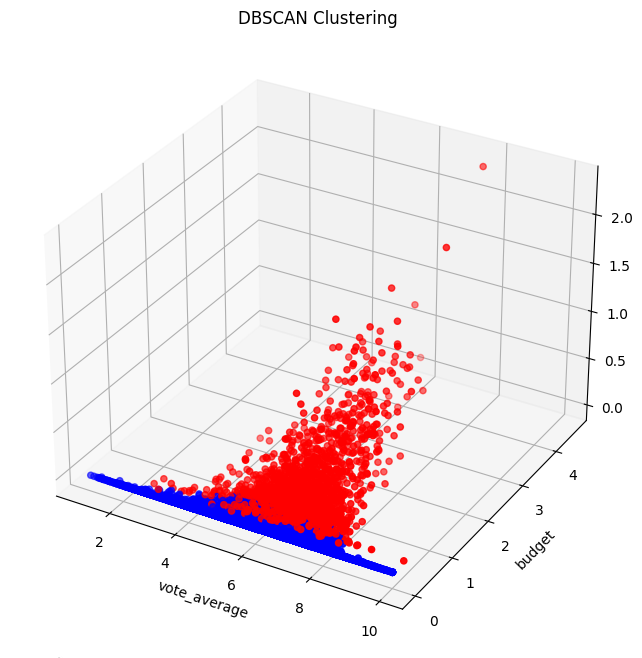

In [21]:
# Make a copy of the DataFrame
X_train_copy = X_train.copy()

# Select the features
X_train_outl = X_train[['revenue', 'budget', 'vote_average']] # This should be 'vote_count' instead of 'vote_average'

# Standardize the data
scaler = StandardScaler()
X_train_outl_scaled = scaler.fit_transform(X_train_outl)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=175)
dbscan.fit(X_train_outl_scaled)

# Add cluster labels to the DataFrame
X_train_copy['cluster'] = dbscan.labels_

# Display the number of clusters and their distribution
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of clusters:", num_clusters)
print("Distribution of clusters:")
print(X_train_copy['cluster'].value_counts())

# Save the indices of outliers in index_0
index_0 = X_train_copy[X_train_copy['cluster'] == -1].index.tolist()

# Create a color list for the clusters
colors = ['blue' if label != -1 else 'red' for label in X_train_copy['cluster']]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the first three features with cluster colors
ax.scatter(X_train_copy['vote_average'], X_train_copy['budget'], X_train_copy['revenue'], c=colors)
ax.set_xlabel('vote_average')
ax.set_ylabel('budget')
ax.set_zlabel('revenue')
ax.set_title('DBSCAN Clustering')

plt.show()

The data points identified as outliers are shown in red. The remaining data points were assigned to a cluster. We will remove the data points identified as outliers from the training set, as well as the "cluster" column.

In [22]:
# Remove outliers based on DBSCAN cluster labels
X_train_out = X_train_copy.drop(index_0)

# Drop the 'cluster' column from the cleaned DataFrame
X_train_out.drop(columns=['cluster'], axis=1, inplace=True)

# Print information about the original and cleaned DataFrames
print("Shape of original dataframe X_train:", X_train.shape)
print("Shape of new dataframe X_train_out after removing outliers using DBSCAN method:", X_train_out.shape)

num_removed_outliers_v1 = len(index_0)
print("Number of removed outliers using DBSCAN method:", num_removed_outliers_v1)

Shape of original dataframe X_train: (72920, 24)
Shape of new dataframe X_train_out after removing outliers using DBSCAN method: (71325, 24)
Number of removed outliers using DBSCAN method: 1595


At this point, we need to redefine the dataset y_train, as it would no longer match the new X_train from which the outliers have been removed.

In [23]:
X_train = X_train_out
y_train = X_train[['vote_average']].copy()

X_train.drop('vote_average', axis=1, inplace=True)
X_test.drop('vote_average', axis=1, inplace=True)

### First Pipeline

We define the first pipeline. This pipeline uses almost all previously defined transformers and as mentioned earlier (except "ColumnClusterTransformer", "LogTransformer" and "ScaleColumnsTransformer"). Adjustments arising from new features or changes in the data need to be made almost exclusively here.  
The second pipeline will be used later for the grid search and includes the three transformers that we omitted in the first pipeline: "ColumnClusterTransformer", "LogTransformer" and "ScaleColumnsTransformer". The reason for this separation is that the first pipeline enables systematic and efficient preprocessing of the dataset, ensuring that the data is transformed and structured appropriately for subsequent modeling tasks, while the second pipeline allows for quicker adjustments in data transformation or the choice of scaler during the model optimization process.

In [24]:
# Define bins for categorizing the 'vote_count' feature into different ranges
bins = [8, 20, 100, 500, 1000, 2000, 4000, np.inf]
# Define labels corresponding to the bins
labels = ['1', '2', '3', '4', '5', '6', '7']

# Specify columns that will undergo specific processing
columns_to_process = ['backdrop_path', 'homepage', 'overview', 'poster_path', 'tagline']

# Define pairs of columns for various transformations, such as creating new features
column_pairs = [
    ('budget', 'popularity'), 
    ('popularity', 'budget'),
    ('popularity', 'release_year'),
    ('release_year', 'popularity'), 
    ('vote_count', 'movie_age'), 
    ('vote_count', 'popularity')
]

# Define pairs of columns where the mean of one column is to be calculated based on another
column_pairs_mean = [
    ('popularity', 'release_year'),
    ('runtime', 'release_year'), 
    ('vote_count', 'release_year')
]

# Define the number of vectorized features for specific columns
vec_col_number = [
    ('genres', 100), 
    ('production_companies', 80), 
    ('production_countries', 100), 
    ('spoken_languages', 100), 
    ('original_language', 90), 
    ('keywords', 30)
]

# Specify columns for which the sum will be calculated
columns_to_sum = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'original_language', 'keywords']

# Define columns to be dropped from the dataset
columns_to_drop = ['title', 'status', 'release_date', 'original_title']

# Create a pipeline to process the dataset with various transformations
new_cols_pipe = Pipeline([
    # Transform the 'release_date' column using a custom transformer
    ('release_date', ReleaseDateTransformer()),
    
    # Categorize the 'vote_count' column into bins
    ('category', ColumnCategoryTransformer(column_name='vote_count', bins=bins, labels=labels)),
    
    # Process additional specified columns
    ('processed_columns', ProcessColumns(columns_to_process)),   
    
    # Binarize the 'adult' column (true/false) into numerical format
    ('label_binarizer', LabelBinarizerTransformer(column_name='adult')),
    
    # Create new columns based on defined column pairs
    ('new_columns', NewColumnTransformer(column_pairs)),
    
    # Calculate means based on defined column pairs
    ('new_columns_mean', NewColumnMeanTransformer(column_pairs_mean)),
    
    # Vectorize specified columns with a maximum number of features
    ('vectorizer', ColumnVectorizer(vec_col_number)),
    
    # Calculate the sum for specified columns
    ('sum_of_columns', SumOfColumnsTransformer(columns_to_sum)),
    
    # Drop specified columns that are not needed for analysis
    ('drop_columns', DropColumnsTransformer(columns_to_drop)), 
    
    # Pass through any remaining columns without transformation
    ('passthrough', 'passthrough') 
])

In [25]:
new_cols_pipe.fit(X_train)
X_train_pipe = new_cols_pipe.transform(X_train)
X_test_pipe = new_cols_pipe.transform(X_test)

print(X_train_pipe.shape)
print(X_test_pipe.shape)

(71325, 302)
(18230, 302)


----
# Machine Learning Approach

We begin by optimizing a **XGBoost regressor** using GridSearchCV, a hyperparameter tuning method that allows us to systematically search for the best parameter combinations to maximize model performance.  
Following the XGBoost optimization, we apply the same GridSearchCV approach to a **(Light-)GBM Regressor** and a **RandomForest regressor** model.   
Once both the LGBM and RandomForest models are optimized, we create a **stacking model**. Stacking is an ensemble learning technique where multiple base models (in this case, the optimized LGBM and RandomForest models) are combined and their predictions are used as input for a final meta-model. In this project, we use a Linear Regression model as the meta-model to blend the predictions of the base models, aiming to capture different patterns and boost overall predictive accuracy.  
  
Finally, to assess the performance of the models, we evaluate them on the **test dataset**. This comparison helps us determine the effectiveness of each model, including the stacking approach, in capturing the underlying patterns in the data. By conducting this comprehensive comparison, we can select the model that offers the best balance between prediction accuracy and computational efficiency for the given problem.
  
To meeasure the errors our models make we use:  
**Mean Squared Error (MSE):**  
MSE is a commonly used metric to evaluate the performance of regression models. It calculates the average of the squared differences between the actual target values and the predicted values from the model. 
Since the errors are squared, MSE penalizes larger errors more heavily than smaller ones. This means that if a model makes a few large mistakes, the MSE will increase significantly. A lower MSE indicates that the model is making predictions that are closer to the actual values.  
**Root Mean Squared Error (RMSE):**  
RMSE is simply the square root of MSE. It brings the error back to the same scale as the target variable, making it more interpretable.
RMSE gives an estimate of the average magnitude of the prediction error. Since RMSE is in the same unit as the target variable, it’s easier to interpret than MSE. For instance, our target variable is between 0 and 10, the RMSE tells us how far off our model's predictions are, on average, from the actual target values.

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import logging
logging.getLogger('lightgbm').setLevel(logging.WARNING)


from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

## XGBRegressor

**XGBoost (Extreme Gradient Boosting)** is a highly efficient and flexible machine learning algorithm that is based on the gradient boosting framework. It is widely used for both classification and regression tasks due to its speed, scalability and accuracy. When applied to regression problems, XGBoost builds a sequence of decision trees to minimize the error in predicting a continuous target variable.  
  
In gradient boosting, models are trained sequentially, with each new model attempting to correct the errors of the previous models. Specifically, XGBoost works by constructing a series of decision trees, where each subsequent tree focuses on learning from the residuals (errors) of the previous tree’s predictions.
In regression tasks, the goal of XGBoost is to minimize a specific loss function, typically the mean squared error (MSE), which measures the difference between predicted and actual values. The model improves its predictions by optimizing this loss function. XGBoost applies gradient descent to iteratively minimize the residuals, making it more effective with each added tree.  
XGBoost builds its predictive model in an additive manner, meaning that each new decision tree is added to the existing ensemble of trees. Instead of fitting a new tree from scratch, XGBoost fits each tree to the errors (residuals) from the previous trees. This way, each tree corrects the mistakes of the previous ones, gradually improving the model's accuracy.  
  
One of the key strengths of XGBoost is its ability to apply regularization to prevent overfitting. It includes both L1 (Lasso) and L2 (Ridge) regularization terms in its objective function, which penalize overly complex models. By controlling the complexity of the trees, XGBoost ensures that the model generalizes well to unseen data, even when the training data is noisy or contains many features.
Unlike traditional decision trees, XGBoost uses a technique called pruning to prevent overfitting. Instead of growing trees until all leaves are pure (which can lead to overfitting), XGBoost grows trees to a maximum depth and then prunes unnecessary branches using a process called maximum delta step. This helps in maintaining a balance between bias and variance.  
  
XGBoost offers a wide range of hyperparameters that can be fine-tuned to optimize performance. Key **hyperparameters used in this project** include:  
**n_estimators:** Specifies the number of boosting iterations (or trees) in the model. More iterations may improve accuracy but also increase the risk of overfitting and computational cost.  
**learning_rate:** Determines the contribution of each tree to the final prediction. A smaller learning rate ensures that the model learns gradually, which helps in finding better solutions but requires more iterations to converge.  
**max_depth:** Limits the depth of the trees to prevent overfitting by constraining how deep the trees can grow.  
**reg_alpha (L1 regularization term):** Adds a penalty to the loss function to control the model's complexity, helping to prevent overfitting.  
**reg_lambda (L2 regularization term):** Similar to reg_alpha, this penalizes large coefficients but applies squared penalties.  
**min_child_weight:** Defines the minimum number of samples required to form a leaf. It prevents leaves from being created with too few data points, which helps avoid overfitting and ensures the model captures more general patterns.  
**subsample:** This parameter controls the fraction of data used for training each tree. For example, by setting it to 0.7, we use 70% of the data for each iteration, which introduces randomness, reduces overfitting and improves generalization.  
  
In summary, an XGBoost regressor is a highly efficient and scalable model based on the gradient boosting algorithm. It builds an ensemble of decision trees, each of which attempts to correct the errors of the previous ones, while regularization techniques ensure that the model generalizes well. XGBoost’s performance, speed and flexibility make it a go-to choice for many regression tasks, especially when working with large, complex datasets. 

The follwowing code performs **hyperparameter tuning** for a XGBoost Regressor.
A dictionary "param_grid_xgb" is created, specifying the range of **hyperparameters for tuning**.   
  
A **pipeline** "pipeline_xgb" is constructed. It includes the following steps:  
-Clustering transformers (ColumnClusterTransformer) for vote_count and release_year columns  
-Log transformation (LogTransformer) for specific columns in columns_to_log_reduced  
-Scaling of selected columns using the ScaleColumnsTransformer  
-An instance of the XGBRegressor to be optimized  
  
A **GridSearchCV** is initialized with the pipeline, using k-fold cross-validation. The scoring metric used is negative mean squared error (neg_mean_squared_error), which evaluates the model's performance by the mean squared error. The verbosity level is set to 2 to track the progress during the search.  
  
The best hyperparameters found are printed.

In [27]:
columns_to_log = ['vote_count', 'revenue', 'budget', 'popularity', 'movie_age']
columns_to_scale = ['vote_count_cluster', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity', 'movie_age', 'release_year', 'release_year_cluster', 'release_season']

for column_A, column_B in column_pairs:
    new_column_name = column_A + '_to_' + column_B
    columns_to_scale.append(new_column_name)
    
for column_A, column_B in column_pairs_mean:
    new_column_name = column_A + '_to_mean_' + column_B
    columns_to_scale.append(new_column_name)
    
for col in columns_to_sum:
    new_column_name = 'sum_of_' + col
    columns_to_scale.append(new_column_name)

The parameter grid defined for the hyperparameter tuning only includes a **limited range of values**. This might seem unusual for a typical grid search, which generally explores a broader set of possible values for hyperparameters. The reason for this constrained search is due to computational constraints. Running a full grid search with many parameter combinations can be highly resource-intensive and time-consuming, especially with complex models.
  
To make the process more manageable, the approach taken here involves narrowing down the hyperparameter space gradually. This means that the parameter grid shown is the result of a more focused search, based on prior experiments, which helped in identifying the most promising ranges and specific values for each hyperparameter. This approach allows for fine-tuning the model without overwhelming computational resources, focusing on the most impactful hyperparameters based on prior insights or iterative refinements.

In [28]:
# Create a parameter grid for XGBoost hyperparameter tuning
param_grid_xgb = {
    'vote_count_cluster__n_clusters': [20],
    'year_cluster__n_clusters': [20],
    'xgb_regressor__n_estimators': [450],  
    'xgb_regressor__learning_rate': [0.001, 0.005],  
    'xgb_regressor__max_depth': [5, 6],  
    'xgb_regressor__reg_alpha': [1.75],
    'xgb_regressor__reg_lambda': [2.75],  
    'xgb_regressor__min_child_weight': [12, 15], 
    'xgb_regressor__subsample': [0.7], 
}


# Build the pipeline for the XGBoost model 
pipeline_xgb = Pipeline([
    # Cluster the 'vote_count' column into 20 groups
    ('vote_count_cluster', ColumnClusterTransformer(column_name='vote_count', n_clusters=20, random_state=42)), 
    
    # Cluster the 'release_year' column into 20 groups
    ('year_cluster', ColumnClusterTransformer(column_name='release_year', n_clusters=20, random_state=42)), 
    
    # Log transform the columns from the list columns_to_log
    ('log_transform', LogTransformer(columns_to_log)),
    
    # Scale the columsn from the list columns_to_scale
    ('scale_columns', ScaleColumnsTransformer(columns_to_scale)),
    
    # Use regressor
    ('xgb_regressor', XGBRegressor(
        objective='reg:squarederror',  # For regression tasks
        random_state=42,
        verbosity=0 
    ))
])

# GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(
    pipeline_xgb, 
    param_grid_xgb, 
    cv=3,  
    scoring='neg_mean_squared_error',  
    verbose=2
)

# Train the model with filtered features and optimize the hyperparameters
grid_search_xgb.fit(X_train_pipe, y_train.values.ravel())

# Output the best hyperparameters found during GridSearchCV
print(f"Best Hyperparameters: {grid_search_xgb.best_params_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END vote_count_cluster__n_clusters=20, xgb_regressor__learning_rate=0.001, xgb_regressor__max_depth=5, xgb_regressor__min_child_weight=12, xgb_regressor__n_estimators=450, xgb_regressor__reg_alpha=1.75, xgb_regressor__reg_lambda=2.75, xgb_regressor__subsample=0.7, year_cluster__n_clusters=20; total time= 1.1min
[CV] END vote_count_cluster__n_clusters=20, xgb_regressor__learning_rate=0.001, xgb_regressor__max_depth=5, xgb_regressor__min_child_weight=12, xgb_regressor__n_estimators=450, xgb_regressor__reg_alpha=1.75, xgb_regressor__reg_lambda=2.75, xgb_regressor__subsample=0.7, year_cluster__n_clusters=20; total time=  54.7s
[CV] END vote_count_cluster__n_clusters=20, xgb_regressor__learning_rate=0.001, xgb_regressor__max_depth=5, xgb_regressor__min_child_weight=12, xgb_regressor__n_estimators=450, xgb_regressor__reg_alpha=1.75, xgb_regressor__reg_lambda=2.75, xgb_regressor__subsample=0.7, year_cluster__n_clusters=20; total

We want to evaluate the performance of the best XGBoost Regressor model, selected through GridSearchCV, on both the training and validation datasets.  
  
The best-performing model is extracted from the GridSearchCV object using best_estimator_. This model has the optimal hyperparameters found during the grid search process.  
Then the model is used to predict the target variable (y_train_pred) on the training set (X_train_pipe), which contains the reduced set of important features.
The mean squared error (MSE) and root mean squared error (RMSE) are computed for the predictions on the training set.  
  
The validation MSE is retrieved from the negative score of the GridSearchCV (best_score_). The RMSE on the validation data is calculated as the square root of the MSE.

In [29]:
# Retrieve the best model from the GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the training data
y_train_pred = best_xgb_model.predict(X_train_pipe)

# Calculate the MSE and RMSE on the training data
mse_train_xgb = mean_squared_error(y_train, y_train_pred)
rmse_train_xgb = np.sqrt(mse_train_xgb)

# Calculate MSE and RMSE on the validation data
mse_valid_xgb = -grid_search_xgb.best_score_
rmse_valid_xgb = (-grid_search_xgb.best_score_) ** 0.5

# Print the error values on the training data
print(f"Training Set MSE (XGBoost): {mse_train_xgb:.4f}")
print(f"Training Set RMSE (XGBoost): {rmse_train_xgb:.4f}")
print(f"Validation Set MSE (XGBoost): {mse_valid_xgb:.4f}")
print(f"Validation Set RMSE (XGBoost): {rmse_valid_xgb:.4f}")

Training Set MSE (XGBoost): 0.7032
Training Set RMSE (XGBoost): 0.8386
Validation Set MSE (XGBoost): 0.7192
Validation Set RMSE (XGBoost): 0.8481


The MSE on the training set is 0.7032 and the RMSE, which is the square root of MSE, is 0.8386. This indicates that the model fits the training data reasonably well, with an average prediction error of about 0.8386 units (RMSE).
  
The MSE on the validation set is 0.7192 and the RMSE is 0.8481. This represents the best result obtained from the GridSearchCV on the validation data. The error on the validation data is only slightly higher than on the training set, showing that the model generalizes well to unseen data.
  
The small difference between training and validation errors (RMSE: 0.8386 vs. 0.8481) suggests that the model has not overfitted and performs similarly on both datasets.

## (Light-) GBMRegressor

The **LightGBM Regressor** is a machine learning algorithm based on the gradient boosting framework, specifically designed for speed and efficiency with large datasets.  

LightGBM operates within the gradient boosting framework, which is an ensemble technique that builds a sequence of weak learners (usually decision trees) to correct the errors of the previous models. In regression, the algorithm minimizes a specific loss function, such as mean squared error (MSE), to reduce the difference between the predicted and actual values. A unique aspect of this algorithm is its approach to growing decision trees. While traditional decision tree algorithms, like XGBoost, use level-wise tree growth (adding nodes at each level), LightGBM uses a leaf-wise growth strategy. This means that it grows trees by expanding the leaf with the largest loss reduction, rather than expanding all leaves at the same level simultaneously. As a result, LightGBM builds deeper trees, which often lead to better accuracy with fewer splits.  
It also introduces a highly efficient histogram-based learning method. Instead of evaluating all possible split points on continuous features (which can be computationally expensive), LightGBM groups the continuous feature values into discrete bins (or histograms). This reduces the number of possible splits and accelerates the training process, especially when dealing with large datasets with high-dimensional features.  
Like other gradient boosting models, LightGBM includes built-in regularization techniques to prevent overfitting. It applies L1 (Lasso) and L2 (Ridge) regularization terms to its objective function, penalizing overly complex models and ensuring that the resulting model generalizes well to unseen data. Additionally, LightGBM can prune trees by discarding leaves that do not significantly contribute to loss reduction.  

LightGBM offers a wide range of hyperparameters that can be fine-tuned to optimize performance. Key **hyperparameters used in this project** include:  
**n_estimators:** Specifies the number of boosting iterations (or trees) in the model. More iterations may improve accuracy but also increase the risk of overfitting and computational cost.  
**learning_rate:** Determines the contribution of each tree to the final prediction. A smaller learning rate ensures that the model learns gradually, which helps in finding better solutions but requires more iterations to converge.  
**num_leaves:** Controls the number of leaves in the tree, which directly affects the complexity of the model.   
**max_depth:** Limits the depth of the trees to prevent overfitting by constraining how deep the trees can grow.  
**reg_alpha (L1 regularization term):** Adds a penalty to the loss function to control the model's complexity, helping to prevent overfitting.  
**reg_lambda (L2 regularization term):** Similar to reg_alpha, this penalizes large coefficients but applies squared penalties.  
**min_child_samples:** Defines the minimum number of samples required to form a leaf. It prevents leaves from being created with too few data points, which helps avoid overfitting and ensures the model captures more general patterns.  
**subsample:** This parameter controls the fraction of data used for training each tree. For example, by setting it to 0.7, we use 70% of the data for each iteration, which introduces randomness, reduces overfitting and improves generalization.  
  
In summary, the LightGBM Regressor is an efficient and powerful machine learning algorithm that leverages the gradient boosting framework to build an ensemble of decision trees. Its innovative leaf-wise growth strategy and histogram-based learning make it highly efficient for large-scale datasets. LightGBM’s flexibility, regularization techniques and support for parallel processing allow it to deliver high accuracy and generalization performance, making it a go-to model for many regression tasks.

The parameter grid defined for the hyperparameter tuning only includes a **limited range of values**. This might seem unusual for a typical grid search, which generally explores a broader set of possible values for hyperparameters. The reason for this constrained search is due to computational constraints. Running a full grid search with many parameter combinations can be highly resource-intensive and time-consuming, especially with complex models.
  
To make the process more manageable, the approach taken here involves narrowing down the hyperparameter space gradually. This means that the parameter grid shown is the result of a more focused search, based on prior experiments, which helped in identifying the most promising ranges and specific values for each hyperparameter. This approach allows for fine-tuning the model without overwhelming computational resources, focusing on the most impactful hyperparameters based on prior insights or iterative refinements.

In [30]:
# Create a new parameter grid for LGBM hyperparameter tuning
param_grid_lgbm = {
    'vote_count_cluster__n_clusters': [20],
    'year_cluster__n_clusters': [20],
    'lgbm_regressor__n_estimators': [400, 450],  
    'lgbm_regressor__learning_rate': [0.001, 0.005],  
    'lgbm_regressor__num_leaves': [45],  
    'lgbm_regressor__max_depth': [25],  
    'lgbm_regressor__reg_alpha': [1.4, 1.6],  
    'lgbm_regressor__reg_lambda': [3.75],  
    'lgbm_regressor__min_child_samples': [70],  
    'lgbm_regressor__subsample': [0.7],  
}

# Build the pipeline for the model 
pipeline_lgbm = Pipeline([
    # Cluster the 'vote_count' column into 20 groups
    ('vote_count_cluster', ColumnClusterTransformer(column_name='vote_count', n_clusters=20, random_state=42)), 
    
    # Cluster the 'release_year' column into 20 groups
    ('year_cluster', ColumnClusterTransformer(column_name='release_year', n_clusters=20, random_state=42)), 
    
    # Log transform the columns from the list columns_to_log
    ('log_transform', LogTransformer(columns_to_log)),
    
    # Scale the columsn from the list columns_to_scale
    ('scale_columns', ScaleColumnsTransformer(columns_to_scale)),
    
    # Use regressor
    ('lgbm_regressor', LGBMRegressor(
        boosting_type='gbdt',       
        random_state=42,
        verbosity=0
    ))
])

# GridSearchCV for hyperparameter tuning
grid_search_lgbm = GridSearchCV(
    pipeline_lgbm, 
    param_grid_lgbm, 
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # MSE scoring metric
    verbose=2  # Display the progress during GridSearch
)

# Train the model using the filtered features and optimize the hyperparameters
grid_search_lgbm.fit(X_train_pipe, y_train.values.ravel())

# Show the best hyperparameters found
print(f"Best Hyperparameters: {grid_search_lgbm.best_params_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END lgbm_regressor__learning_rate=0.001, lgbm_regressor__max_depth=25, lgbm_regressor__min_child_samples=70, lgbm_regressor__n_estimators=400, lgbm_regressor__num_leaves=45, lgbm_regressor__reg_alpha=1.4, lgbm_regressor__reg_lambda=3.75, lgbm_regressor__subsample=0.7, vote_count_cluster__n_clusters=20, year_cluster__n_clusters=20; total time=  12.4s
[CV] END lgbm_regressor__learning_rate=0.001, lgbm_regressor__max_depth=25, lgbm_regressor__min_child_samples=70, lgbm_regressor__n_estimators=400, lgbm_regressor__num_leaves=45, lgbm_regressor__reg_alpha=1.4, lgbm_regressor__reg_lambda=3.75, lgbm_regressor__subsample=0.7, vote_count_cluster__n_clusters=20, year_cluster__n_clusters=20; total time=  14.3s
[CV] END lgbm_regressor__learning_rate=0.001, lgbm_regressor__max_depth=25, lgbm_regressor__min_child_samples=70, lgbm_regressor__n_estimators=400, lgbm_regressor__num_leaves=45, lgbm_regressor__reg_alpha=1.4, lgbm_regressor__

We want to evaluate the performance of the best LightGBM Regressor model, selected through GridSearchCV, on both the training and validation datasets.  
  
The best-performing model is extracted from the GridSearchCV object using best_estimator_. This model has the optimal hyperparameters found during the grid search process.  
Then the model is used to predict the target variable (y_train_pred) on the training set (X_train_important), which contains the reduced set of important features.
The mean squared error (MSE) and root mean squared error (RMSE) are computed for the predictions on the training set.  
  
The validation MSE is retrieved from the negative score of the GridSearchCV (best_score_). The RMSE on the validation data is calculated as the square root of the MSE.

In [31]:
# Get the best model from GridSearchCV
best_lgbm_model = grid_search_lgbm.best_estimator_

# Make predictions on the training data
y_train_pred = best_lgbm_model.predict(X_train_pipe)

# Calculate MSE and RMSE on the training data
mse_train_lgbm = mean_squared_error(y_train, y_train_pred)
rmse_train_lgbm = np.sqrt(mse_train_lgbm)

# Calculate MSE and RMSE on the validation data
mse_valid_lgbm = -grid_search_lgbm.best_score_
rmse_valid_lgbm = (-grid_search_lgbm.best_score_) ** 0.5

# Output the error values on the training data
print(f"Training Set MSE (LGBM): {mse_train_lgbm:.4f}")
print(f"Training Set RMSE (LGBM): {rmse_train_lgbm:.4f}")
print(f"Validation Set MSE (LGBM): {mse_valid_lgbm:.4f}")
print(f"Validation Set RMSE (LGBM): {rmse_valid_lgbm:.4f}")

Training Set MSE (LGBM): 0.6760
Training Set RMSE (LGBM): 0.8222
Validation Set MSE (LGBM): 0.6920
Validation Set RMSE (LGBM): 0.8318


The MSE on the training set is 0.6760 and the corresponding RMSE (Root Mean Squared Error) is 0.8222. This indicates that the LightGBM model fits the training data well, with an average prediction error of about 0.8222 units (RMSE).
  
The MSE on the validation set is 0.6920, with an RMSE of 0.8318. This represents the best result from the GridSearchCV on the validation data, demonstrating that the model generalizes well, with only a small increase in error compared to the training data.
  
The slight difference between training and validation errors (RMSE: 0.8222 vs. 0.8318) indicates that the model has not overfitted and performs consistently on both the training and validation datasets.

## RandomForestRegressor

The **RandomForest Regressor** is an ensemble learning algorithm that operates by constructing multiple decision trees during training and outputting the average prediction of those trees for regression tasks. In a Random Forest, each decision tree is built using a random sample of the data with replacement (bootstrapping). This ensures that each tree learns a slightly different aspect of the data. Additionally, at each node of the decision tree, the algorithm selects a random subset of features rather than considering all features. This randomness helps to decorrelate the trees, making the ensemble more robust to overfitting compared to a single decision tree. The final prediction of the forest is the average of predictions from all individual trees, smoothing out any irregularities or biases from individual trees.

Like other ensemble methods, Random Forest is highly robust to overfitting, especially when compared to individual decision trees. By averaging the results of multiple trees, it reduces the likelihood that the model will capture noise from the training data, which makes it a reliable choice for many regression tasks.

Key hyperparameters used in this project include:  
**n_estimators (Number of Trees):** This parameter controls the number of decision trees in the forest. A higher number of trees usually leads to more stable predictions, but at the cost of increased training time.  
**max_depth (Maximum Depth):** This parameter limits how deep each tree can grow. By restricting the depth, we prevent the trees from becoming too complex and overfitting to the training data. This ensures that the model generalizes better to unseen data.  
**min_samples_split:** This parameter defines the minimum number of samples required to split an internal node. It can help capture more subtle patterns in the data.
**min_samples_leaf:** This parameter specifies the minimum number of samples required to be present in a leaf node.  
**max_features (Number of Features for Each Split):** By setting max_features to 'sqrt', the model will randomly sample the square root of the total number of features at each split. This adds diversity to the decision trees, preventing them from over-relying on dominant features and improving model robustness.  
**bootstrap:** With bootstrapping enabled (True), the model uses random sampling with replacement, ensuring that each tree in the forest is trained on a slightly different subset of the data. This helps in reducing variance and making the model less prone to overfitting.  
  
In summary, the RandomForest Regressor offers a powerful and flexible approach to regression problems. Its ability to average the predictions of multiple decision trees helps reduce overfitting and improve generalization, particularly when working with noisy data. By controlling the depth of trees, number of features per split and the number of trees in the forest, we ensure that the model captures the underlying patterns in the data without becoming too complex.

The parameter grid defined for the hyperparameter tuning only includes a **limited range of values**. This might seem unusual for a typical grid search, which generally explores a broader set of possible values for hyperparameters. The reason for this constrained search is due to computational constraints. Running a full grid search with many parameter combinations can be highly resource-intensive and time-consuming, especially with complex models.
  
To make the process more manageable, the approach taken here involves narrowing down the hyperparameter space gradually. This means that the parameter grid shown is the result of a more focused search, based on prior experiments, which helped in identifying the most promising ranges and specific values for each hyperparameter. This approach allows for fine-tuning the model without overwhelming computational resources, focusing on the most impactful hyperparameters based on prior insights or iterative refinements.

In [32]:
# Create a parameter grid for Random Forest hyperparameter tuning
param_grid_rf = {
    'vote_count_cluster__n_clusters': [20],
    'year_cluster__n_clusters': [20],
    'rf_regressor__n_estimators': [500, 550], 
    'rf_regressor__max_depth': [10, 11],  
    'rf_regressor__min_samples_split': [70, 80],  
    'rf_regressor__min_samples_leaf': [60],  
    'rf_regressor__max_features': ['sqrt'], 
    'rf_regressor__bootstrap': [True],  
}

# Build the pipeline for the Random Forest model
pipeline_rf = Pipeline([
    # Cluster the 'vote_count' column into 20 groups
    ('vote_count_cluster', ColumnClusterTransformer(column_name='vote_count', n_clusters=20, random_state=42)), 
    
    # Cluster the 'release_year' column into 20 groups
    ('year_cluster', ColumnClusterTransformer(column_name='release_year', n_clusters=20, random_state=42)), 
    
    # Log transform the columns from the list columns_to_log
    ('log_transform', LogTransformer(columns_to_log)),
    
    # Scale the columsn from the list columns_to_scale
    ('scale_columns', ScaleColumnsTransformer(columns_to_scale)),
    
    # Use regressor
    ('rf_regressor', RandomForestRegressor(
        random_state=42,
        verbose=0 
    ))
])

# GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(
    pipeline_rf, 
    param_grid_rf, 
    cv=3,
    scoring='neg_mean_squared_error',  
    verbose=2
)

# Train the model with filtered features and optimize the hyperparameters
grid_search_rf.fit(X_train_pipe, y_train.values.ravel())

# Output the best hyperparameters found during GridSearchCV
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END rf_regressor__bootstrap=True, rf_regressor__max_depth=10, rf_regressor__max_features=sqrt, rf_regressor__min_samples_leaf=60, rf_regressor__min_samples_split=70, rf_regressor__n_estimators=500, vote_count_cluster__n_clusters=20, year_cluster__n_clusters=20; total time=  34.7s
[CV] END rf_regressor__bootstrap=True, rf_regressor__max_depth=10, rf_regressor__max_features=sqrt, rf_regressor__min_samples_leaf=60, rf_regressor__min_samples_split=70, rf_regressor__n_estimators=500, vote_count_cluster__n_clusters=20, year_cluster__n_clusters=20; total time=  34.7s
[CV] END rf_regressor__bootstrap=True, rf_regressor__max_depth=10, rf_regressor__max_features=sqrt, rf_regressor__min_samples_leaf=60, rf_regressor__min_samples_split=70, rf_regressor__n_estimators=500, vote_count_cluster__n_clusters=20, year_cluster__n_clusters=20; total time=  34.8s
[CV] END rf_regressor__bootstrap=True, rf_regressor__max_depth=10, rf_regressor__m

We want to evaluate the performance of the best RandomForest Regressor model, selected through GridSearchCV, on both the training and validation datasets.  
  
The best-performing model is extracted from the GridSearchCV object using best_estimator_. This model has the optimal hyperparameters found during the grid search process.  
Then the model is used to predict the target variable (y_train_pred) on the training set (X_train_pipe), which contains the reduced set of important features.
The mean squared error (MSE) and root mean squared error (RMSE) are computed for the predictions on the training set.  
  
The validation MSE is retrieved from the negative score of the GridSearchCV (best_score_). The RMSE on the validation data is calculated as the square root of the MSE.

In [33]:
# Retrieve the best model from the GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the training data
y_train_pred_rf = best_rf_model.predict(X_train_pipe)

# Calculate the MSE and RMSE on the training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)

# Calculate MSE and RMSE on the validation data
mse_valid_rf = -grid_search_rf.best_score_
rmse_valid_rf = (-grid_search_rf.best_score_) ** 0.5

# Print the error values on the training data
print(f"Training Set MSE (Random Forest): {mse_train_rf:.4f}")
print(f"Training Set RMSE (Random Forest): {rmse_train_rf:.4f}")
print(f"Validation Set MSE (Random Forest): {mse_valid_rf:.4f}")
print(f"Validation Set RMSE (Random Forest): {rmse_valid_rf:.4f}")

Training Set MSE (Random Forest): 0.7754
Training Set RMSE (Random Forest): 0.8806
Validation Set MSE (Random Forest): 0.7962
Validation Set RMSE (Random Forest): 0.8923


The Mean Squared Error (MSE) on the training set is 0.7754 and the corresponding Root Mean Squared Error (RMSE) is 0.8806. This indicates that the Random Forest model fits the training data relatively well, with an average prediction error of around 0.8806 units (RMSE).
  
The MSE on the validation set is 0.7962, with an RMSE of 0.8923. These values reflect the best result from the GridSearchCV on the validation data, demonstrating that the model generalizes reasonably well to unseen data.
  
The small difference between the training and validation errors (RMSE: 0.8806 vs. 0.8923) suggests that the Random Forest model is not overfitting and maintains good performance on both datasets.

## Stacking Regressor

The dataset is updated daily and this change over time can impact the choice of the best model. **Stacking** offers an alternative approach in this scenario. The outputs of the trained models are combined, making the selection of the best model more irrelevant. The performance of stacking typically aligns closely with that of the best individual model.

Stacking is a powerful ensemble learning technique that combines the predictions of multiple models to create a stronger, more accurate model. The key concept behind stacking is that different models may have unique strengths and weaknesses. By combining these models in a structured way, stacking aims to leverage their strengths while compensating for their individual weaknesses, ultimately improving the predictive performance of the overall system.

In the context of a stacking regressor, the approach works as follows:

**Base Models (Level 1 Models):** Stacking involves training multiple base models, which could be different types of regressors. These models are trained independently on the same training data. Each base model learns different patterns from the data and makes predictions.  
**Meta-Model (Level 2 Model):** After training the base models, a new model, known as the meta-model or meta-learner, is trained to combine the predictions of these base models. The meta-model takes the predictions of the base models as its input features. Its job is to learn how to best weight or blend these predictions to improve the overall accuracy of the final predictions.  
For example, the meta-model might learn that one base model performs well in some situations but poorly in others, while another base model does the opposite. By learning from these strengths and weaknesses, the meta-model can generate more accurate predictions.  
  
Once the stacking regressor is trained, predictions on new, unseen data follow a two-stage process:
First, the base models make their predictions on the input data. These predictions are then passed to the meta-model, which produces the final prediction.
  
The core idea behind stacking is that different models can capture different patterns in the data. Some models may perform better in certain scenarios, while others may excel in different cases. By combining them, stacking aims to create a model that generalizes better to unseen data. This often leads to better predictive performance than relying on a single model alone, especially when the base models are diverse and complementary.

In summary, a stacking regressor is an ensemble model that uses the predictions of several base regressors to train a meta-regressor. The final prediction is a combination of the base models' outputs, optimized by the meta-model to minimize prediction error.

The combination of LGBMRegressor and RandomForestRegressor is chosen to leverage the strengths of both models. 
 
- LightGBM offers high prediction accuracy, fast computation and is efficient with large datasets. 
  It is a powerful gradient boosting model but can be sensitive to hyperparameter tuning.
- RandomForest is robust, less prone to overfitting and performs well across a wide range of datasets. 
  However, it can be slower and less precise than boosting methods like LightGBM on large, high-dimensional data.

By combining these models in a stacking ensemble:
- LightGBM provides strong predictive performance.
- RandomForest adds stability to the predictions, particularly in the presence of noisy data.

This balanced combination is expected to achieve better generalization by capturing both model strengths, improving robustness and accuracy.

In [34]:
# Create the Stacking model with the best models from the GridSearchCV and LinearRegression as the final estimator
stacking_model = StackingRegressor(
    estimators=[
        ('lgbm', best_lgbm_model), # Best XGBoost model
        ('rf', best_rf_model) # Best RandomForest model
    ],
    final_estimator=LinearRegression(),  # Linear regression as the meta-model
    passthrough=True  
)

It is a good idea to use cross-validation before training our stacking model (to avoid data leakage). This helps avoid overfitting and ensures the meta-model generalizes well.  
The model is retrained during each fold of cross-validation, ensuring that it does not receive any information from the validation data. 

In [35]:
# Perform cross-validation to evaluate the model performance
cv_scores = cross_val_score(stacking_model, X_train_pipe, y_train.values.ravel(), cv=3, scoring='neg_mean_squared_error')

mse_valid_stack = -cv_scores.max()
rmse_valid_stack = np.sqrt(mse_valid_stack)

print(f'All MSEs: {cv_scores}')
print(f'Best Cross-validated MSE: {mse_valid_stack:.4f}')
print(f'Best Cross-validated RMSE: {rmse_valid_stack:.4f}')

All MSEs: [-73.12336657  -0.63803899  -0.64226455]
Best Cross-validated MSE: 0.6380
Best Cross-validated RMSE: 0.7988


The cross-validation process was used here to evaluate the model’s performance on different subsets of the training data, meaning the model was not trained on the entire dataset at once.  
The best cross-validated RMSE of 0.7988 shows that, under the best scenario, the stacking model achieves a relatively low prediction error on unseen data.  

Once cross-validation is done, we train the stacking model on the full training set and evaluate it on the test set.

In [36]:
# Train the stacking model using the important features
stacking_model.fit(X_train_pipe, y_train.values.ravel())

StackingRegressor(estimators=[('lgbm',
                               Pipeline(steps=[('vote_count_cluster',
                                                ColumnClusterTransformer(column_name='vote_count')),
                                               ('year_cluster',
                                                ColumnClusterTransformer(column_name='release_year')),
                                               ('log_transform',
                                                LogTransformer(columns_to_log=['vote_count',
                                                                               'revenue',
                                                                               'budget',
                                                                               'popularity',
                                                                               'movie_age'])),
                                               ('scale_columns',
                                                ScaleColumnsTransformer(col...
                                                                                          'sum_of_genres',
                                                                                          'sum_of_production_companies',
                                                                                          'sum_of_production_countries',
                                                                                          'sum_of_spoken_languages',
                                                                                          'sum_of_original_language',
                                                                                          'sum_of_keywords'])),
                                               ('rf_regressor',
                                                RandomForestRegressor(max_depth=11,
                                                                      max_features='sqrt',
                                                                      min_samples_leaf=60,
                                                                      min_samples_split=70,
                                                                      n_estimators=500,
                                                                      random_state=42))]))],
                  final_estimator=LinearRegression(), passthrough=True)

In [37]:
# Make predictions on the training data
y_train_pred_stack = stacking_model.predict(X_train_pipe)

# Calculate the MSE and RMSE on the training data for the stacking model
mse_train_stack = mean_squared_error(y_train, y_train_pred_stack)
rmse_train_stack = np.sqrt(mse_train_stack)

# Output the error values on the training data
print(f"Training Set MSE (Stacking): {mse_train_stack:.4f}")
print(f"Training Set RMSE (Stacking): {rmse_train_stack:.4f}")

Training Set MSE (Stacking): 0.6164
Training Set RMSE (Stacking): 0.7851


The Mean Squared Error (MSE) on the training set is 0.6164 and the corresponding Root Mean Squared Error (RMSE) is 0.7851. This indicates that the stacking model fits the training data quite well, with an average prediction error of about 0.7851 units (RMSE).
  
The slight difference between training and cross-validation errors (RMSE: 0.7851 vs. 0.7988) indicates that the stacking model has not overfitted and performs consistently on both the training and cross-validation datasets.

### Test Set and Comparison

Comparing all models individually (XGBoost, LGBM, RadnomForest and the stacking model) on the test set can be very informative. It allows us to evaluate the performance of each base model separately and see how the stacking model improves (or doesn't) upon them. This can give us insights into whether the meta-model actually adds value or if one of the base models is performing better on its own.

We can check if the stacking model performs better than the individual base models. If the stacking model underperforms, it might indicate issues with how the meta-model is combining predictions.

In [38]:
# Apply the pipeline to the test dataset
y_pred = best_xgb_model.predict(X_test_pipe)

# Calculate the error on the test data
mse_test_xgb = mean_squared_error(y_test, y_pred)
rmse_test_xgb = mse_test_xgb ** 0.5

print(f"Test Set MSE (XGBoost): {mse_test_xgb:.4f}")
print(f"Test Set RMSE (XGBoost): {rmse_test_xgb:.4f}")

Test Set MSE (XGBoost): 0.7417
Test Set RMSE (XGBoost): 0.8612


In [39]:
# Apply the best model to the test dataset
y_pred = best_lgbm_model.predict(X_test_pipe)

# Calculate the error on the test data
mse_test_lgbm = mean_squared_error(y_test, y_pred)
rmse_test_lgbm = mse_test_lgbm ** 0.5

print(f"Test Set MSE (LGBM): {mse_test_lgbm:.4f}")
print(f"Test Set RMSE (LGBM): {rmse_test_lgbm:.4f}")

Test Set MSE (LGBM): 0.7102
Test Set RMSE (LGBM): 0.8427


In [40]:
# Apply the pipeline to thetest dataset
y_pred_rf = best_rf_model.predict(X_test_pipe)

# Calculate the error on the test data
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print(f"Test Set MSE (Random Forest): {mse_test_rf:.4f}")
print(f"Test Set RMSE (Random Forest): {rmse_test_rf:.4f}")

Test Set MSE (Random Forest): 0.8063
Test Set RMSE (Random Forest): 0.8979


In [41]:
# Apply the stacking model on the test dataset
y_pred_stack = stacking_model.predict(X_test_pipe)

# Calculate the error on the test data for the stacking model
mse_test_stack = mean_squared_error(y_test, y_pred_stack)
rmse_test_stack = np.sqrt(mse_test_stack)

# Output the error values on the test data
print(f"Test Set MSE (Stacking): {mse_test_stack:.4f}")
print(f"Test Set RMSE (Stacking): {rmse_test_stack:.4f}")

Test Set MSE (Stacking): 0.6692
Test Set RMSE (Stacking): 0.8181


In [42]:
# Creating a dataframe for comparison
data = {
    'XGBoost': [mse_train_xgb, rmse_train_xgb, mse_valid_xgb, rmse_valid_xgb, mse_test_xgb, rmse_test_xgb],
    'LGBM': [mse_train_lgbm, rmse_train_lgbm, mse_valid_lgbm, rmse_valid_lgbm, mse_test_lgbm, rmse_test_lgbm],
    'RandomForest': [mse_train_rf, rmse_train_rf, mse_valid_rf, rmse_valid_rf, mse_test_rf, rmse_test_rf],
    'Stacking': [mse_train_stack, rmse_train_stack, mse_valid_stack, rmse_valid_stack, mse_test_stack, rmse_test_stack]
}

# Creating the index for the dataframe
index = ['MSE Train', 'RMSE Train', 'MSE Valid', 'RMSE Valid', 'MSE Test', 'RMSE Test']

df_metrics = pd.DataFrame(data, index=index)
pd.options.display.float_format = '{:.4f}'.format

df_metrics

,XGBoost,LGBM,RandomForest,Stacking
MSE Train,0.7032,0.6760,0.7754,0.6164
RMSE Train,0.8386,0.8222,0.8806,0.7851
MSE Valid,0.7192,0.6920,0.7962,0.6380
RMSE Valid,0.8481,0.8318,0.8923,0.7988
MSE Test,0.7417,0.7102,0.8063,0.6692
RMSE Test,0.8612,0.8427,0.8979,0.8181


**Training Performance:**  
The Stacking model achieved the best performance on the training set, with the lowest MSE and RMSE. This indicates that the stacking approach effectively combined the strengths of both the LGBM and RandomForest models, fitting the training data more closely than either of the individual models.
XGBoost followed closely behind the stacking model, with a slightly higher training MSE.  
**Validation Performance:**  
When evaluated on the validation set, the Stacking model again outperformed the other models. This confirms that the stacking model generalizes better than the individual models on unseen data.
LGBM showed slightly better validation performance compared to XGBoost.  
**Test Performance:**  
On the final test set, the Stacking model continued to deliver the best results, with the lowest MSE and RMSE. This consistent performance across training, validation and test sets indicates that the stacking model is robust and well-generalized.
LGBM again outperformed XGBoost on the test set, though the difference was relatively small.

## Final Conclusion

The Stacking model consistently demonstrated superior performance across all evaluation metrics compared to the other models. It achieved the lowest errors in test set, indicating that combining the predictions of these two base models with a linear regression meta-model provided a meaningful improvement. This suggests that the stacking model is able to capture more complex relationships in the data by leveraging the complementary strengths of the base models.

While LGBM performed better than XGBoost on both the validation and test sets, the difference in performance was marginal.  
  
All three models individually showed strong results, but the stacking approach clearly provided additional predictive power.